This file contains a demo of our clustering method for the IHSAA realignment project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

Alrighty. I'm new to this geopandas business, but I've downloaded a shape file and all neccessary packages. Let's see if we can make a map.

<AxesSubplot:>

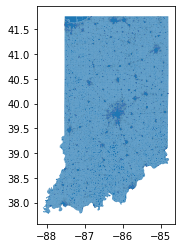

In [7]:
# reading the shape file for Indiana
indiana = gpd.read_file('indianaShapeFile/tl_2010_18_tabblock10.shp')

#plotting the map of Indiana
indiana['geometry'].plot()

Great! We can make a map of Indiana. But can we see how our data looks on it?

A good place to start would be reading the data in the most unintelligent way possible:

In [2]:
# Here's the data...I might want to read this from a txt file at some point
centroids  = np.array([
  [ 38.15072716666666, -86.86364733333333 ],
  [ 41.47958268431372, -87.30673332745098 ],
  [ 39.90802385333334, -86.67711727333331 ],
  [ 39.036739606666664, -85.16439204666666 ],
  [ 41.16945018378376, -85.10324452162163 ],
  [ 39.29745803157895, -87.27394719473685 ],
  [ 40.65429372083332, -85.86661005416666 ],
  [ 41.59631146, -86.38885869500001 ],
  [ 40.338513488888886, -87.1230131111111 ],
  [ 40.918037638095235, -86.60880087142857 ],
  [ 39.341077294117646, -85.73362205882353 ],
  [ 40.08160930384615, -85.73689247692309 ],
  [ 38.40397078333333, -85.8384879625 ],
  [ 38.058483190476196, -87.55351257142858 ],
  [ 38.69158125384616, -86.3373981153846 ],
  [ 41.513847013636365, -85.88937974545453 ],
  [ 38.65202661666667, -87.25363064166665 ],
  [ 39.79089943972602, -86.16727300821917 ],
  [ 39.28673415714285, -86.55979062142858 ],
  [ 40.01723722173913, -85.10544579130433 ]
])

hosts = np.array([
  [ 41.3128995, -87.0219989 ],
  [ 40.83544089999999, -84.9097075 ],
  [ 39.88570199999999, -86.148265 ],
  [ 39.2247317, -85.9111673 ],
  [ 38.1204493, -86.9868071 ],
  [ 39.75457, -86.8781882 ],
  [ 41.6391921, -86.0242741 ],
  [ 40.9112106, -86.2811641 ],
  [ 39.10041409999999, -84.8542642 ],
  [ 41.082914, -85.6352871 ],
  [ 38.823844, -86.17186 ],
  [ 38.7910505, -87.30965239999999 ],
  [ 41.291663, -87.393821 ],
  [ 38.7102179, -85.471719 ],
  [ 39.6345265, -84.92126069999999 ],
  [ 39.4256537, -87.4086657 ],
  [ 41.3467725, -85.1268665 ],
  [ 37.973365, -87.4856221 ],
  [ 40.473575, -85.9722795 ],
  [ 40.7348927, -87.08473099999999 ]
])

groups = np.array([
  [
    [ 38.1204493, -86.9868071 ],
    [ 37.9034486, -87.106274 ],
    [ 37.9102913, -86.7438865 ],
    [ 38.40240319999999, -86.9502047 ],
    [ 38.4509433, -86.7964178 ],
    [ 37.9544498, -86.76347690000001 ],
    [ 38.228591, -86.85648789999999 ],
    [ 38.274853, -86.9651751 ],
    [ 38.111115, -86.604096 ]
  ],
  [
    [ 41.291663, -87.393821 ],
    [ 41.3128995, -87.0219989 ],
    [ 41.395982, -87.1658174 ],
    [ 41.7109893, -86.9025721 ],
    [ 41.4658068, -87.4730886 ],
    [ 41.5557479, -87.31512459999999 ],
    [ 41.39182659999999, -87.0258513 ],
    [ 41.5521309, -87.1683276 ],
    [ 41.60579329999999, -87.50959639999999 ],
    [ 41.5465057, -87.45795269999999 ],
    [ 41.4944455, -87.3298741 ],
    [ 41.5200779, -87.2318198 ],
    [ 41.1937181, -87.1986416 ],
    [ 41.4792721, -87.17921369999999 ],
    [ 41.6403209, -87.4853127 ],
    [ 41.5314779, -87.4375855 ],
    [ 41.3128296, -87.1996494 ],
    [ 41.6281603, -87.4919649 ],
    [ 41.5930723, -87.4073713 ],
    [ 41.5421062, -86.894426 ],
    [ 41.5890906, -87.0646117 ],
    [ 41.32, -86.89 ],
    [ 41.5771782, -87.24519579999999 ],
    [ 41.558364, -87.2803287 ],
    [ 41.6810164, -87.4937826 ],
    [ 41.4930768, -87.06773369999999 ],
    [ 41.6180157, -87.5235886 ],
    [ 41.5540111, -87.50254079999999 ],
    [ 41.5476024, -87.4091306 ],
    [ 41.378695, -87.4580749 ],
    [ 41.0348281, -87.4250106 ],
    [ 41.5756843, -87.4870145 ],
    [ 41.6781582, -87.5069676 ],
    [ 41.5975589, -87.338747 ],
    [ 41.5103768, -87.3335219 ],
    [ 41.6011394, -87.3838638 ],
    [ 41.4844011, -86.9945464 ],
    [ 41.586398, -87.439764 ],
    [ 41.5982845, -87.3920034 ],
    [ 41.1884715, -87.1497211 ],
    [ 41.5930723, -87.4073713 ],
    [ 41.0348281, -87.4250106 ],
    [ 41.5465057, -87.45795269999999 ],
    [ 41.5975589, -87.338747 ],
    [ 41.41921, -87.5088765 ],
    [ 41.3878349, -87.360475 ],
    [ 41.3878349, -87.360475 ],
    [ 41.41921, -87.5088765 ],
    [ 41.39182659999999, -87.0258513 ],
    [ 41.1875401, -87.2051731 ],
    [ 41.5561186, -87.3684334 ]
  ],
  [
    [ 39.75457, -86.8781882 ],
    [ 40.058319, -86.4624662 ],
    [ 39.7569997, -86.5401579 ],
    [ 40.251284, -86.5920069 ],
    [ 39.6433429, -86.8437592 ],
    [ 39.8767352, -86.5421187 ],
    [ 40.3264255, -86.3927764 ],
    [ 40.057381, -86.61975100000001 ],
    [ 39.8489339, -86.8022295 ],
    [ 39.665807, -86.559061 ],
    [ 40.2813193, -86.4849653 ],
    [ 40.0209269, -86.90744409999999 ],
    [ 39.6444898, -86.8647316 ],
    [ 39.7893338, -86.80237149999999 ],
    [ 39.6444898, -86.8647316 ]
  ],
  [
    [ 38.7102179, -85.471719 ],
    [ 39.10041409999999, -84.8542642 ],
    [ 38.7412863, -85.0799978 ],
    [ 39.3108997, -85.23415829999999 ],
    [ 38.7728199, -85.4020839 ],
    [ 38.7581139, -85.3889876 ],
    [ 39.0637306, -84.92923259999999 ],
    [ 39.0510358, -85.2483537 ],
    [ 39.12848049999999, -85.12753520000001 ],
    [ 39.4288148, -84.998817 ],
    [ 38.9499436, -84.8599749 ],
    [ 39.1407312, -85.2931808 ],
    [ 39.3425846, -85.2007007 ],
    [ 39.2792013, -84.97479109999999 ],
    [ 38.7728199, -85.4020839 ]
  ],
  [
    [ 41.3467725, -85.1268665 ],
    [ 40.83544089999999, -84.9097075 ],
    [ 41.190198, -85.192605 ],
    [ 41.0754802, -85.1487872 ],
    [ 41.3294601, -85.0506417 ],
    [ 41.1077269, -85.08243139999999 ],
    [ 41.728413, -84.93793529999999 ],
    [ 41.4347459, -85.257449 ],
    [ 41.6391359, -85.2001714 ],
    [ 41.522286, -84.91995899999999 ],
    [ 40.975684, -84.96250700000002 ],
    [ 41.1382677, -85.4814371 ],
    [ 41.065179, -85.013209 ],
    [ 41.4086638, -85.04036889999999 ],
    [ 40.880603, -85.1663593 ],
    [ 41.398205, -85.41856299999999 ],
    [ 41.0541247, -85.2120692 ],
    [ 41.1314342, -85.1251644 ],
    [ 40.7461276, -84.9424082 ],
    [ 41.1051339, -85.0457916 ],
    [ 41.0016349, -85.14034629999999 ],
    [ 41.0975724, -85.1354575 ],
    [ 41.1104098, -85.11800389999999 ],
    [ 41.1235004, -84.91912719999999 ],
    [ 41.0430292, -85.28614999999999 ],
    [ 41.4321074, -84.86233109999999 ],
    [ 41.23181659999999, -85.3242078 ],
    [ 41.0525403, -85.1365921 ],
    [ 40.72556180000001, -85.1638208 ],
    [ 41.2200549, -85.0178239 ],
    [ 41.1457583, -85.1393406 ],
    [ 41.035264, -85.133105 ],
    [ 41.6318244, -84.9716567 ],
    [ 40.6473144, -84.9602961 ],
    [ 41.1457583, -85.1393406 ],
    [ 40.880603, -85.1663593 ],
    [ 41.6318244, -84.9716567 ]
  ],
  [
    [ 39.4256537, -87.4086657 ],
    [ 39.4606165, -87.4896802 ],
    [ 39.69776969999999, -87.3221118 ],
    [ 39.0255378, -86.9459796 ],
    [ 39.2795231, -87.1093873 ],
    [ 39.2254733, -87.39053059999999 ],
    [ 39.7686071, -87.2333753 ],
    [ 39.0354756, -87.0472317 ],
    [ 39.0436706, -87.1642755 ],
    [ 39.1595628, -87.2123124 ],
    [ 39.5179259, -87.1657103 ],
    [ 39.10540659999999, -87.41130009999999 ],
    [ 39.49413910000001, -87.3624615 ],
    [ 39.6908521, -87.415174 ],
    [ 39.4256537, -87.4086657 ],
    [ 39.10540659999999, -87.41130009999999 ],
    [ 39.0733789, -87.2712797 ],
    [ 39.0436706, -87.1642755 ],
    [ 39.0733789, -87.2712797 ]
  ],
  [
    [ 40.473575, -85.9722795 ],
    [ 41.082914, -85.6352871 ],
    [ 40.3955167, -86.2428446 ],
    [ 40.7601763, -86.0725535 ],
    [ 40.4532769999999, -86.0547709 ],
    [ 40.6516995, -86.0658023 ],
    [ 40.3749463, -86.0535977 ],
    [ 40.8960503, -86.06615409999999 ],
    [ 40.7399858, -85.7792588 ],
    [ 40.855702, -85.794668 ],
    [ 40.3532529, -86.08798639999999 ],
    [ 40.5462021, -85.5079116 ],
    [ 40.579319, -85.821725 ],
    [ 40.4987152, -85.6128418 ],
    [ 40.806979, -85.82508899999999 ],
    [ 40.6636628, -86.2533541 ],
    [ 40.607691, -85.27991469999999 ],
    [ 40.5389673, -85.66869109999999 ],
    [ 41.0119751, -85.7713251 ],
    [ 40.4555488, -86.1572119 ],
    [ 40.8920241, -85.51004449999999 ],
    [ 41.0119751, -85.7713251 ],
    [ 40.579319, -85.821725 ],
    [ 40.473575, -85.9722795 ]
  ],
  [
    [ 41.6011891, -86.7268627 ],
    [ 41.7277848, -86.331558 ],
    [ 41.6757012, -86.22156679999999 ],
    [ 41.2417828, -86.2503017 ],
    [ 41.6506953, -86.1975998 ],
    [ 41.46420699999999, -86.816215 ],
    [ 41.6625271, -86.1618228 ],
    [ 41.6810258, -86.23992489999999 ],
    [ 41.5370947, -86.27150669999999 ],
    [ 41.3473756, -86.3027616 ],
    [ 41.6778243, -86.8624962 ],
    [ 41.6544786, -86.2433179 ],
    [ 41.6753115, -86.315173 ],
    [ 41.7319028, -86.2383969 ],
    [ 41.6666024, -86.2239488 ],
    [ 41.3886536, -86.5519008 ],
    [ 41.4574282, -86.4799099 ],
    [ 41.6852237, -86.56465829999999 ],
    [ 41.714197, -86.21259380000001 ],
    [ 41.6852237, -86.56465829999999 ]
  ],
  [
    [ 40.7348927, -87.08473099999999 ],
    [ 40.436141, -86.9118518 ],
    [ 40.3985978, -86.8758502 ],
    [ 40.4187467, -86.7983371 ],
    [ 40.1260147, -86.90672649999999 ],
    [ 40.3927809, -86.8870068 ],
    [ 40.276809, -87.2514159 ],
    [ 40.29861229999999, -87.38645269999999 ],
    [ 40.14312, -87.3953339 ],
    [ 40.8079239, -87.3843312 ],
    [ 40.5639565, -87.2423965 ],
    [ 40.1063712, -87.2271677 ],
    [ 40.3498875, -86.90143959999999 ],
    [ 39.96784299999999, -87.453126 ],
    [ 39.96784299999999, -87.453126 ],
    [ 40.4986657, -86.91388769999999 ],
    [ 40.1063712, -87.2271677 ],
    [ 40.4986657, -86.91388769999999 ]
  ],
  [
    [ 41.028479, -86.890402 ],
    [ 40.9347524, -87.1358991 ],
    [ 40.9112106, -86.2811641 ],
    [ 40.6642995, -86.86279900000001 ],
    [ 41.2250781, -86.4255321 ],
    [ 41.04594700000001, -86.59630399999999 ],
    [ 40.7515141, -86.3325643 ],
    [ 40.8673476, -86.8755843 ],
    [ 40.74207579999999, -86.7701417 ],
    [ 41.0578505, -86.2239488 ],
    [ 40.4141819, -86.596074 ],
    [ 41.2141338, -86.78695530000002 ],
    [ 40.5458593, -86.48054189999999 ],
    [ 41.2229063, -86.4161192 ],
    [ 41.285422, -86.6259141 ],
    [ 40.5764436, -86.6647018 ],
    [ 40.8612098, -86.49349509999999 ],
    [ 41.2229063, -86.4161192 ],
    [ 40.9112106, -86.2811641 ],
    [ 40.9347524, -87.1358991 ],
    [ 40.8612098, -86.49349509999999 ]
  ],
  [
    [ 39.2247317, -85.9111673 ],
    [ 39.2926055, -85.7700062 ],
    [ 39.3516992, -85.9708433 ],
    [ 39.6117983, -85.8734102 ],
    [ 39.6725742, -85.70174329999999 ],
    [ 39.3428778, -85.4679725 ],
    [ 39.4410806, -85.84558439999999 ],
    [ 39.4530489, -85.66230430000002 ],
    [ 38.9564996, -85.9061744 ],
    [ 38.9988337, -85.6410784 ],
    [ 39.3831089, -85.477679 ],
    [ 39.6211095, -85.4490007 ],
    [ 39.1951678, -85.8861986 ],
    [ 39.3084449, -85.57889999999999 ],
    [ 39.5062308, -85.789248 ],
    [ 38.9854537, -85.8779601 ],
    [ 39.4530489, -85.66230430000002 ]
  ],
  [
    [ 40.2199448, -85.7723113 ],
    [ 40.1829374, -85.4937837 ],
    [ 39.8224805, -85.6577423 ],
    [ 40.0928616, -85.6674874 ],
    [ 39.7956007, -85.5263629 ],
    [ 40.0059557, -85.5245303 ],
    [ 39.97728439999999, -85.965577 ],
    [ 40.0773686, -85.8404654 ],
    [ 40.384526, -85.6763689 ],
    [ 39.9015402, -85.8444647 ],
    [ 40.2725473, -86.03957539999999 ],
    [ 40.066309, -85.6906747 ],
    [ 40.313376, -85.5006776 ],
    [ 40.2900924, -85.83534590000001 ],
    [ 39.972324, -85.91561899999999 ],
    [ 39.7932862, -85.7819176 ],
    [ 40.1967204, -85.41227459999999 ],
    [ 39.9970733, -85.7350955 ],
    [ 40.1184688, -85.5545355 ],
    [ 40.1656354, -86.01550560000001 ],
    [ 40.0563564, -85.99796429999999 ],
    [ 40.0865443, -85.6802457 ],
    [ 40.2521566, -85.6783201 ],
    [ 39.7932862, -85.7819176 ],
    [ 39.9970733, -85.7350955 ],
    [ 40.2900924, -85.83534590000001 ]
  ],
  [
    [ 38.2987932, -85.8110215 ],
    [ 38.2009707, -86.1193358 ],
    [ 38.5655254, -85.5414253 ],
    [ 38.68073649999999, -85.7809205 ],
    [ 38.2394083, -85.9888677 ],
    [ 38.4001918, -85.7358344 ],
    [ 38.4081936, -85.7553138 ],
    [ 38.0820509, -86.00194069999999 ],
    [ 38.30640390000001, -85.7844334 ],
    [ 38.4543684, -85.6672466 ],
    [ 38.3245452, -85.8278258 ],
    [ 38.798089, -85.8366396 ],
    [ 38.322028, -86.1441722 ],
    [ 38.6282793, -85.7753886 ],
    [ 38.514589, -86.00228899999999 ],
    [ 38.3327561, -85.930774 ],
    [ 38.298365, -85.7681357 ],
    [ 38.5459302, -85.7729703 ],
    [ 38.4667284, -85.9458044 ],
    [ 38.3163151, -85.7114758 ],
    [ 38.3163151, -85.7114758 ],
    [ 38.4699787, -85.94676 ],
    [ 38.3245452, -85.8278258 ],
    [ 38.4001918, -85.7358344 ]
  ],
  [
    [ 37.973365, -87.4856221 ],
    [ 37.9637555, -87.5398945 ],
    [ 37.97356380000001, -87.6061272 ],
    [ 38.0528076, -87.2790425 ],
    [ 38.0106898, -87.49498129999999 ],
    [ 37.9372802, -87.8879265 ],
    [ 38.368701, -87.5712537 ],
    [ 37.9888227, -87.6158605 ],
    [ 38.029056, -87.577349 ],
    [ 38.1424196, -87.80153829999999 ],
    [ 37.9716319, -87.5368038 ],
    [ 37.9372802, -87.8879265 ],
    [ 38.19409, -87.340918 ],
    [ 37.9858808, -87.3841739 ],
    [ 37.9729899, -87.5686546 ],
    [ 38.2371497, -87.6349872 ],
    [ 38.1158294, -87.5520172 ],
    [ 38.2371497, -87.6349872 ],
    [ 37.9707971, -87.441391 ],
    [ 37.9707971, -87.441391 ],
    [ 38.19409, -87.340918 ]
  ],
  [
    [ 38.823844, -86.17186 ],
    [ 38.8825761, -86.4407155 ],
    [ 38.6678738, -86.45446720000001 ],
    [ 38.88618900000001, -86.0454716 ],
    [ 38.5504533, -86.61587150000001 ],
    [ 38.6115128, -86.1066246 ],
    [ 38.3193875, -86.3528504 ],
    [ 38.5506576, -86.47722399999999 ],
    [ 38.6664401, -86.7911096 ],
    [ 38.583932, -86.23446600000001 ],
    [ 38.7366461, -86.4800423 ],
    [ 38.824855, -86.1700012 ],
    [ 38.88618900000001, -86.0454716 ]
  ],
  [
    [ 41.6391921, -86.0242741 ],
    [ 41.63950690000001, -85.9617466 ],
    [ 41.1111362, -86.0427577 ],
    [ 41.617463, -85.538989 ],
    [ 41.6356983, -85.9286979 ],
    [ 41.2192291, -85.79597319999999 ],
    [ 41.66975619999999, -85.7350955 ],
    [ 41.6790759, -86.108057 ],
    [ 41.3013211, -86.10853449999999 ],
    [ 41.4254052, -85.5808959 ],
    [ 41.5804716, -85.8233391 ],
    [ 41.6969951, -86.0137518 ],
    [ 41.6851334, -85.95887359999999 ],
    [ 41.4435666, -86.152644 ],
    [ 41.4606821, -85.9980441 ],
    [ 41.4180015, -85.7589398 ],
    [ 41.6539964, -85.4101481 ],
    [ 41.2241533, -85.8647852 ],
    [ 41.5455389, -85.8266256 ],
    [ 41.5177497, -85.76778589999999 ],
    [ 41.4435666, -86.152644 ],
    [ 41.6969951, -86.0137518 ]
  ],
  [
    [ 38.7910505, -87.30965239999999 ],
    [ 38.678324, -86.922016 ],
    [ 38.433741, -87.242316 ],
    [ 38.3314698, -87.3513688 ],
    [ 38.651115, -87.50047219999999 ],
    [ 38.6588562, -87.16799499999999 ],
    [ 38.6691205, -87.0491546 ],
    [ 38.6348312, -87.4205388 ],
    [ 38.6781059, -87.5342538 ],
    [ 38.6592224, -87.17403379999999 ],
    [ 38.8474324, -87.0621139 ],
    [ 38.7910505, -87.30965239999999 ]
  ],
  [
    [ 39.88570199999999, -86.148265 ],
    [ 39.6906434, -86.10781829999999 ],
    [ 39.8301525, -86.028578 ],
    [ 39.8897639, -86.1209724 ],
    [ 39.7200089, -85.89027430000002 ],
    [ 39.8338133, -86.1853628 ],
    [ 40.0510064, -86.1304132 ],
    [ 39.68223589999999, -86.3785364 ],
    [ 39.89353699999999, -86.143404 ],
    [ 39.765816, -86.068934 ],
    [ 39.602931, -86.11696889999999 ],
    [ 39.8814458, -86.25071249999999 ],
    [ 40.0510064, -86.1304132 ],
    [ 39.7929437, -86.2931356 ],
    [ 39.788792, -86.15530389999999 ],
    [ 39.5841972, -86.1230913 ],
    [ 39.80084, -86.252904 ],
    [ 39.7273196, -86.1474722 ],
    [ 40.0104107, -86.0878736 ],
    [ 39.9587127, -86.2729923 ],
    [ 39.7312519, -86.1242086 ],
    [ 39.7361572, -86.3886078 ],
    [ 39.670824, -86.143028 ],
    [ 39.9799754, -86.119833 ],
    [ 39.8881082, -86.0574213 ],
    [ 39.86181759999999, -86.1275101 ],
    [ 39.6201179, -86.3768316 ],
    [ 39.7333845, -86.15212369999999 ],
    [ 39.7651095, -86.1991575 ],
    [ 39.8128605, -86.2156115 ],
    [ 39.85667, -86.0382149 ],
    [ 39.7827876, -86.2934069 ],
    [ 39.9458131, -86.3645604 ],
    [ 39.7829242, -86.169851 ],
    [ 39.7761846, -86.13337659999999 ],
    [ 39.6875126, -86.274232 ],
    [ 39.6860448, -86.06171250000001 ],
    [ 39.9548397, -86.2126732 ],
    [ 39.8181082, -86.1552244 ],
    [ 39.6760364, -86.01595089999999 ],
    [ 40.139807, -86.217169 ],
    [ 39.8961663, -86.0349536 ],
    [ 39.8346569, -86.1358527 ],
    [ 39.7434072, -86.0885837 ],
    [ 39.8520967, -86.0798184 ],
    [ 39.7113969, -86.07653499999999 ],
    [ 39.40715429999999, -86.16050249999999 ],
    [ 39.5518498, -86.0841784 ],
    [ 39.76759759999999, -86.20242770000002 ],
    [ 39.7923501, -85.9987618 ],
    [ 39.511817, -86.0884774 ],
    [ 39.7740683, -86.19138579999999 ],
    [ 39.9104297, -86.2098686 ],
    [ 39.6483986, -86.1665921 ],
    [ 39.7684575, -86.085293 ],
    [ 39.9119447, -86.12965059999999 ],
    [ 39.5755892, -86.194643 ],
    [ 39.8298485, -86.11456869999999 ],
    [ 39.8299773, -86.38797079999999 ],
    [ 39.7868616, -86.0853726 ],
    [ 39.511817, -86.0884774 ],
    [ 39.7929437, -86.2931356 ],
    [ 39.6201179, -86.3768316 ],
    [ 39.68223589999999, -86.3785364 ],
    [ 39.9119447, -86.12965059999999 ],
    [ 39.8099777, -86.1929676 ],
    [ 39.9587127, -86.2729923 ],
    [ 39.8814458, -86.25071249999999 ],
    [ 39.8099777, -86.1929676 ],
    [ 39.9210895, -86.1587224 ],
    [ 39.7683207, -86.11197039999999 ],
    [ 39.8171446, -86.24371470000001 ],
    [ 39.7982497, -86.13068330000002 ]
  ],
  [
    [ 39.4194664, -86.4116121 ],
    [ 39.5243282, -86.64245140000001 ],
    [ 39.1431494, -86.5287046 ],
    [ 39.2340568, -86.6381617 ],
    [ 39.51196460000001, -86.7911159 ],
    [ 39.2023625, -86.5490592 ],
    [ 39.2046253, -86.2439528 ],
    [ 39.1138334, -86.5453533 ],
    [ 39.0312243, -86.7376298 ],
    [ 39.575635, -86.478105 ],
    [ 39.288654, -86.78154699999999 ],
    [ 39.2023625, -86.5490592 ],
    [ 39.1431494, -86.5287046 ],
    [ 39.4194664, -86.4116121 ]
  ],
  [
    [ 39.6345265, -84.92126069999999 ],
    [ 39.9348001, -84.91231119999999 ],
    [ 39.82019349999999, -84.90052229999999 ],
    [ 39.8131337, -84.9991623 ],
    [ 40.1685329, -85.2634822 ],
    [ 40.1080198, -85.3931312 ],
    [ 39.8322102, -85.35113220000001 ],
    [ 39.9118103, -85.3778894 ],
    [ 40.205017, -84.815247 ],
    [ 40.20104, -85.388736 ],
    [ 40.052241, -84.9455942 ],
    [ 39.8163113, -85.16705449999999 ],
    [ 40.0019205, -85.32864459999999 ],
    [ 39.6366808, -85.1605745 ],
    [ 40.278546, -85.34763799999999 ],
    [ 39.9204461, -85.16106049999999 ],
    [ 40.4293504, -85.0226964 ],
    [ 40.18138769999999, -84.9747648 ],
    [ 40.047306, -85.14148709999999 ],
    [ 39.8249876, -84.8953034 ],
    [ 40.19159, -85.1675489 ],
    [ 40.205017, -84.815247 ],
    [ 40.18138769999999, -84.9747648 ]
  ]
])



<ipython-input-2-f38d7b187e4f>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  groups = np.array([


It seems as though we'll need to take the transpose of the data to be consistent with the map coordinates.

In [3]:

centroids = centroids.T
hosts= hosts.T
g0 = np.array(groups[0]).T
g1 = np.array(groups[1]).T
g2 = np.array(groups[2]).T
g3 = np.array(groups[3]).T
g4 = np.array(groups[4]).T
g5 = np.array(groups[5]).T
g6 = np.array(groups[6]).T
g7 = np.array(groups[7]).T
g8 = np.array(groups[8]).T
g9 = np.array(groups[9]).T
g10 = np.array(groups[10]).T
g11 = np.array(groups[11]).T
g12 = np.array(groups[12]).T
g13 = np.array(groups[13]).T
g14 = np.array(groups[14]).T
g15 = np.array(groups[15]).T
g16 = np.array(groups[16]).T
g17 = np.array(groups[17]).T
g18 = np.array(groups[18]).T
g19 = np.array(groups[19]).T

Great! Now, let's plot our centroids and hosts:

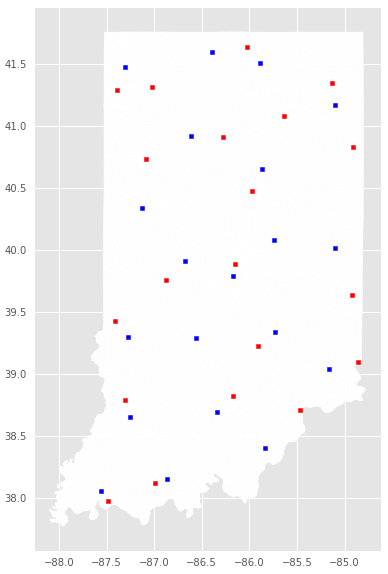

In [33]:
# Centroids/Host Schools
indiana = gpd.read_file('indianaShapeFile/tl_2010_18_tabblock10.shp')

with plt.style.context(("seaborn", "ggplot")):
    indiana['geometry'].plot(figsize=(18,10),
               color="white",
               edgecolor = "white")
    plt.scatter(centroids[1], centroids[0], s=15, c='b', marker="s", label='first')
    plt.scatter(hosts[1], hosts[0], s=15, c='r', marker="s", label='first')

Amazing!! Now, let's look at our clusters:

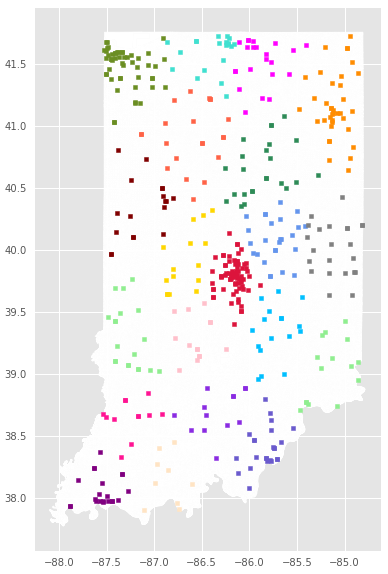

In [6]:
indiana = gpd.read_file('indianaShapeFile/tl_2010_18_tabblock10.shp')

with plt.style.context(("seaborn", "ggplot")):
    indiana['geometry'].plot(figsize=(18,10),
               color="white",
               edgecolor = "white")
    plt.scatter(g0[1], g0[0], s=15, c='bisque', marker="s", label='first')
    plt.scatter(g1[1], g1[0], s=15, c='olivedrab', marker="s", label='first')
    plt.scatter(g2[1], g2[0], s=15, c='gold', marker="s", label='first')
    plt.scatter(g3[1], g3[0], s=15, c='lightgreen', marker="s", label='first')
    plt.scatter(g4[1], g4[0], s=15, c='darkorange', marker="s", label='first')
    plt.scatter(g5[1], g5[0], s=15, c='lightgreen', marker="s", label='first')
    plt.scatter(g6[1], g6[0], s=15, c='seagreen', marker="s", label='first')
    plt.scatter(g7[1], g7[0], s=15, c='turquoise', marker="s", label='first')
    plt.scatter(g8[1], g8[0], s=15, c='maroon', marker="s", label='first')
    plt.scatter(g9[1], g9[0], s=15, c='tomato', marker="s", label='first')
    plt.scatter(g10[1], g10[0], s=15, c='deepskyblue', marker="s", label='first')
    plt.scatter(g11[1], g11[0], s=15, c='cornflowerblue', marker="s", label='first')
    plt.scatter(g12[1], g12[0], s=15, c='slateblue', marker="s", label='first')
    plt.scatter(g13[1], g13[0], s=15, c='purple', marker="s", label='first')
    plt.scatter(g14[1], g14[0], s=15, c='blueviolet', marker="s", label='first')
    plt.scatter(g15[1], g15[0], s=15, c='magenta', marker="s", label='first')
    plt.scatter(g16[1], g16[0], s=15, c='deeppink', marker="s", label='first')
    plt.scatter(g17[1], g17[0], s=15, c='crimson', marker="s", label='first')
    plt.scatter(g18[1], g18[0], s=15, c='pink', marker="s", label='first')
    plt.scatter(g19[1], g19[0], s=15, c='gray', marker="s", label='first')

Okay, so this map might look pretty, but how well did it actually do? Now, we'll check the Euclidean distance within each group: